# 데이터 드리프트 

- 2025-07-07, JPark KETI

## 요약
- 데이터 드리프트는 훈련 데이터와 실제 서비스 환경의 데이터 분포가 달라지는 현상을 의미하며, 이는 기계 학습 모델의 성능 저하로 직결됩니다. 
- 모델이 훈련 데이터에만 최적화되어 실제 환경의 변화를 따라가지 못하기 때문입니다.
- 12가지 핵심 데이터 드리프트 사례와 각 사례에 대한 시뮬레이션 및 분석을 위한 파이썬 코드를 제시합니다.
- 각 시뮬레이션은 드리프트 유형에 따른 데이터 변화를 인위적으로 생성하고, 모델 성능 변화를 보여주는 방식으로 구성됩니다.


## 서론: 데이터 드리프트란 무엇인가?

- 정의: 모델 훈련에 사용된 데이터의 통계적 특성과 실제 서비스 환경에서 모델이 마주하는 데이터의 통계적 특성이 시간에 따라 달라지는 현상

- 영향: 모델 예측 정확도 하락, 비즈니스 의사결정 오류, 시스템 신뢰도 저하

- 중요성: 지속적인 모니터링 및 재훈련 전략의 필요성

## 데이터 드리프트의 주요 유형

- 개념 드리프트 (Concept Drift): 입력(X)과 출력(Y) 사이의 관계(P(Y∣X))가 변하는 경우

- 특성 드리프트 (Feature Drift) / 공변량 드리프트 (Covariate Shift): 입력 특성(X)의 분포(P(X))가 변하는 경우

- 레이블 드리프트 (Label Shift): 출력/타겟 변수(Y)의 분포(P(Y))가 변하는 경우


## 공통 라이브러리

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import ks_2samp # Kolmogorov-Smirnov test

## 사례 1: 입력 특성 값 범위 변화 (Scaling Shift)

- 설명: 가장 흔한 유형 중 하나로, 특정 입력 특성의 값 범위(평균, 분산)가 변화합니다. 예를 들어, 센서 데이터의 보정 오류, 새로운 측정 단위 도입 등이 있을 수 있습니다.

- 영향: 스케일에 민감한 모델(예: SVM, 신경망, KNN)의 성능에 직접적인 영향을 미칩니다.

- 시뮬레이션: 훈련 데이터는 특정 범위의 특성 값을 가지지만, 서비스 데이터에서는 이 특성의 평균이나 분산이 달라집니다.


--- 사례 1: 입력 특성 값 범위 변화 (Scaling Shift) ---
훈련 데이터 정확도: 0.9960
드리프트 없는 테스트 데이터 정확도: 0.9960
드리프트 발생 후 테스트 데이터 정확도: 0.9990


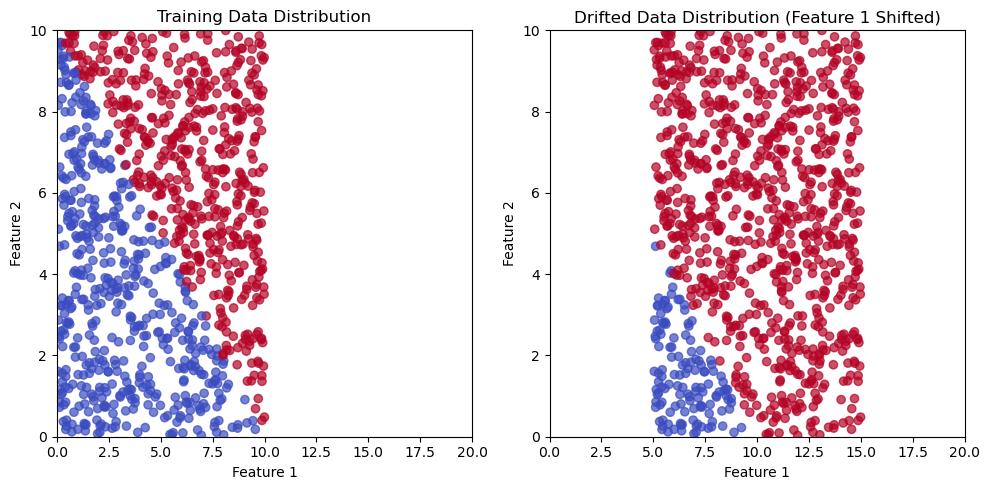

KS-test p-value for Feature 1 (Train vs Drifted): 0.0000 (p < 0.05 indicates significant difference)


In [18]:
# --- 사례 1: 입력 특성 값 범위 변화 (Scaling Shift) ---
print("\n--- 사례 1: 입력 특성 값 범위 변화 (Scaling Shift) ---")

# 1. 데이터 생성 (훈련 데이터)
np.random.seed(42)
n_samples = 1000
X_train = np.random.rand(n_samples, 2) * 10 # 특성 X1, X2가 0~10 범위
y_train = (X_train[:, 0] + X_train[:, 1] > 10).astype(int) # 간단한 분류 기준

# 2. 모델 학습
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 3. 서비스 데이터 생성 (드리프트 발생)
# X1의 평균이 증가 (오른쪽으로 이동)
X_test_drifted = X_train.copy()
X_test_drifted[:, 0] = X_test_drifted[:, 0] + 5 # X1에 5만큼 더함 (스케일 변화)
y_test_drifted = (X_test_drifted[:, 0] + X_test_drifted[:, 1] > 10).astype(int) # 실제 레이블은 드리프트된 X_test_drifted 기준

# 4. 성능 평가
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy_no_drift = accuracy_score(y_train, model.predict(X_train)) # 드리프트 없는 경우 (참조)
test_accuracy_drifted = accuracy_score(y_test_drifted, model.predict(X_test_drifted))

print(f"훈련 데이터 정확도: {train_accuracy:.4f}")
print(f"드리프트 없는 테스트 데이터 정확도: {test_accuracy_no_drift:.4f}")
print(f"드리프트 발생 후 테스트 데이터 정확도: {test_accuracy_drifted:.4f}")

# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title('Training Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(0, 20)
plt.ylim(0, 10)

plt.subplot(1, 2, 2)
plt.scatter(X_test_drifted[:, 0], X_test_drifted[:, 1], c=y_test_drifted, cmap='coolwarm', alpha=0.7)
plt.title('Drifted Data Distribution (Feature 1 Shifted)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(0, 20)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

# KS 테스트로 분포 변화 확인 (정량적)
ks_stat, p_value = ks_2samp(X_train[:, 0], X_test_drifted[:, 0])
print(f"KS-test p-value for Feature 1 (Train vs Drifted): {p_value:.4f} (p < 0.05 indicates significant difference)")

## 사례 2: 입력 특성 분포 형태 변화 (Distribution Shape Change)

- 설명: 특성 값의 평균이나 분산뿐 아니라, 분포의 형태 자체가 변하는 경우입니다 (예: 정규 분포에서 이항 분포로, 또는 왜도/첨도 변화). 새로운 모집단의 유입, 데이터 수집 방식의 근본적인 변화 등이 원인일 수 있습니다.

- 영향: 모델이 학습한 결정 경계가 새로운 분포에 적합하지 않게 되어 성능이 저하됩니다.

- 시뮬레이션: 훈련 데이터는 정규 분포를 따르지만, 서비스 데이터는 다른 형태의 분포(예: 지수 분포)를 따르도록 합니다.


--- 사례 2: 입력 특성 분포 형태 변화 (Distribution Shape Change) ---
훈련 데이터 정확도: 1.0000
드리프트 발생 후 테스트 데이터 정확도: 1.0000


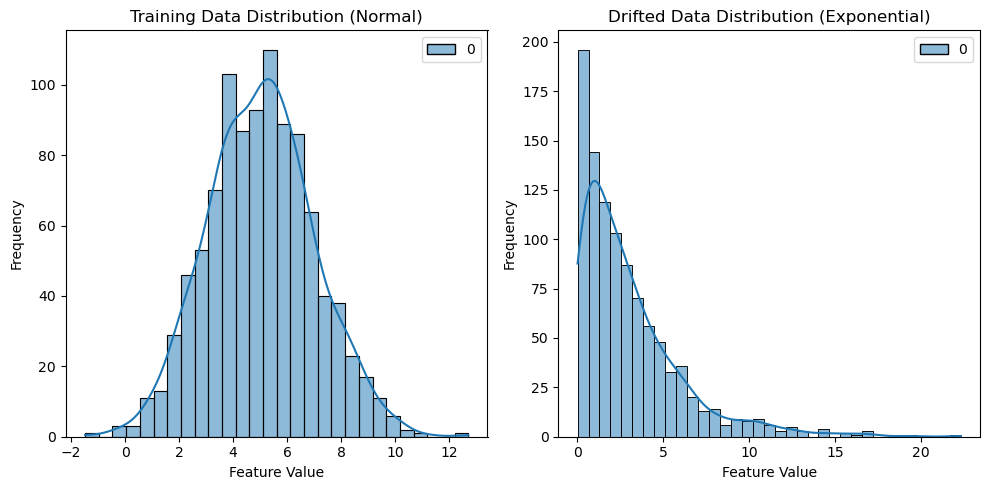

KS-test p-value for Feature Distribution (Train vs Drifted): 0.0000


In [19]:
# --- 사례 2: 입력 특성 분포 형태 변화 (Distribution Shape Change) ---
print("\n--- 사례 2: 입력 특성 분포 형태 변화 (Distribution Shape Change) ---")

# 1. 데이터 생성 (훈련 데이터 - 정규 분포)
np.random.seed(42)
n_samples = 1000
X_train_dist = np.random.normal(loc=5, scale=2, size=(n_samples, 1))
y_train_dist = (X_train_dist > 5).astype(int).flatten()

# 2. 모델 학습
model_dist = LogisticRegression(random_state=42)
model_dist.fit(X_train_dist, y_train_dist)

# 3. 서비스 데이터 생성 (드리프트 발생 - 지수 분포)
X_test_drifted_dist = np.random.exponential(scale=3, size=(n_samples, 1)) # 평균은 비슷하게 맞춤
y_test_drifted_dist = (X_test_drifted_dist > 5).astype(int).flatten()

# 4. 성능 평가
train_accuracy_dist = accuracy_score(y_train_dist, model_dist.predict(X_train_dist))
test_accuracy_drifted_dist = accuracy_score(y_test_drifted_dist, model_dist.predict(X_test_drifted_dist))

print(f"훈련 데이터 정확도: {train_accuracy_dist:.4f}")
print(f"드리프트 발생 후 테스트 데이터 정확도: {test_accuracy_drifted_dist:.4f}")

# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(X_train_dist, kde=True, color='blue')
plt.title('Training Data Distribution (Normal)')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(X_test_drifted_dist, kde=True, color='red')
plt.title('Drifted Data Distribution (Exponential)')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# KS 테스트
ks_stat_dist, p_value_dist = ks_2samp(X_train_dist.flatten(), X_test_drifted_dist.flatten())
print(f"KS-test p-value for Feature Distribution (Train vs Drifted): {p_value_dist:.4f}")

## 사례 3: 새로운 특성 값의 출현 (Novelty/Outlier Drift)

- 설명: 훈련 데이터에는 없었던 완전히 새로운 유형의 특성 값이 서비스 데이터에서 나타나는 경우입니다. 이는 범주형 특성에서 흔하게 발생하며, 새로운 사용자 그룹, 제품, 지역 등이 추가될 때 발생할 수 있습니다.

- 영향: 모델은 새로운 특성 값에 대해 예측할 수 없거나, 잘못된 예측을 할 가능성이 높습니다.

- 시뮬레이션: 범주형 특성에 새로운 카테고리가 추가됩니다.


--- 사례 3: 새로운 특성 값의 출현 (Novelty/Outlier Drift) ---
훈련 데이터 정확도: 1.0000
드리프트 발생 후 테스트 데이터 정확도: 1.0000


/var/folders/pv/78hsfpv1623068f45h32ygw80000gn/T/ipykernel_36914/2262383453.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_train_cat.flatten(), ax=ax[0], palette='viridis')
/var/folders/pv/78hsfpv1623068f45h32ygw80000gn/T/ipykernel_36914/2262383453.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_test_drifted_cat_raw.flatten(), ax=ax[1], palette='viridis')


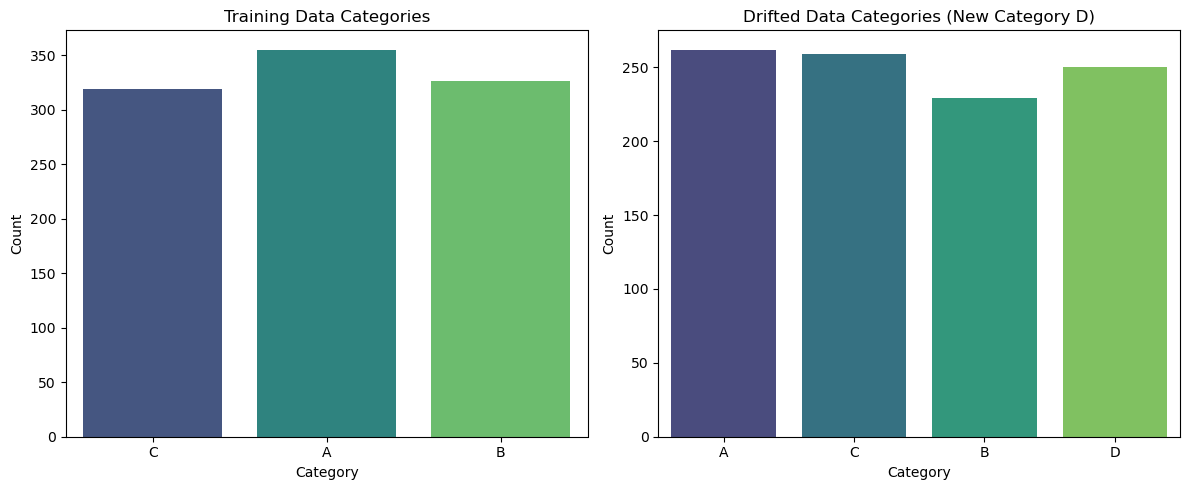

In [20]:
# --- 사례 3: 새로운 특성 값의 출현 (Novelty/Outlier Drift) ---
print("\n--- 사례 3: 새로운 특성 값의 출현 (Novelty/Outlier Drift) ---")

# 1. 데이터 생성 (훈련 데이터)
np.random.seed(42)
n_samples = 1000
# 특성: ['A', 'B', 'C']
X_train_cat = np.random.choice(['A', 'B', 'C'], size=(n_samples, 1))
y_train_cat = (X_train_cat == 'A').astype(int).flatten()

# One-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train_cat)

# 2. 모델 학습
model_cat = LogisticRegression(random_state=42)
model_cat.fit(X_train_encoded, y_train_cat)

# 3. 서비스 데이터 생성 (드리프트 발생 - 새로운 카테고리 'D' 추가)
X_test_drifted_cat_raw = np.random.choice(['A', 'B', 'C', 'D'], size=(n_samples, 1), p=[0.25, 0.25, 0.25, 0.25])
y_test_drifted_cat = (X_test_drifted_cat_raw == 'A').astype(int).flatten() # 레이블은 'A'에만 반응

# 새로운 카테고리 'D'가 포함된 데이터를 인코딩. handle_unknown='ignore'로 처리
X_test_drifted_encoded = encoder.transform(X_test_drifted_cat_raw)

# 4. 성능 평가
train_accuracy_cat = accuracy_score(y_train_cat, model_cat.predict(X_train_encoded))
test_accuracy_drifted_cat = accuracy_score(y_test_drifted_cat, model_cat.predict(X_test_drifted_encoded))

print(f"훈련 데이터 정확도: {train_accuracy_cat:.4f}")
print(f"드리프트 발생 후 테스트 데이터 정확도: {test_accuracy_drifted_cat:.4f}")

# 시각화 (범주형 데이터 분포)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=X_train_cat.flatten(), ax=ax[0], palette='viridis')
ax[0].set_title('Training Data Categories')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Count')

sns.countplot(x=X_test_drifted_cat_raw.flatten(), ax=ax[1], palette='viridis')
ax[1].set_title('Drifted Data Categories (New Category D)')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

## 사례 4: 특성 간 관계 변화 (Feature Interaction Change)

- 설명: 두 개 이상의 특성 사이의 상호작용 방식이 변하는 경우입니다. 예를 들어, 특정 조건(특성 A의 값)에서만 특성 B가 결과에 큰 영향을 미치게 되는 경우 등이 있습니다.

- 영향: 특성 간 복잡한 관계를 학습한 모델(예: 트리 기반 모델, 신경망)의 성능이 저하됩니다.

- 시뮬레이션: 훈련 데이터에서는 X1 + X2가 중요하지만, 서비스 데이터에서는 X1 * X2가 중요해집니다.



--- 사례 4: 특성 간 관계 변화 (Feature Interaction Change) ---
훈련 데이터 정확도: 1.0000
드리프트 발생 후 테스트 데이터 정확도: 0.9110


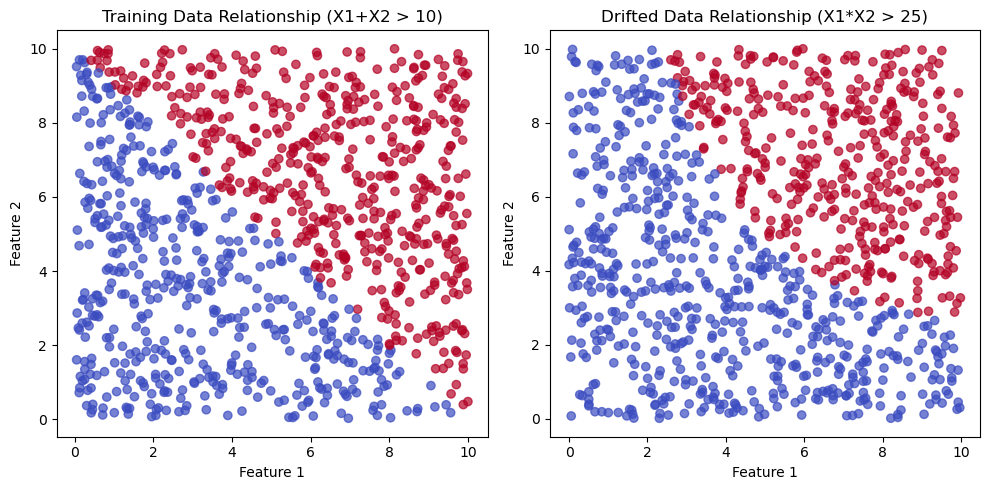

In [21]:
# --- 사례 4: 특성 간 관계 변화 (Feature Interaction Change) ---
print("\n--- 사례 4: 특성 간 관계 변화 (Feature Interaction Change) ---")

# 1. 데이터 생성 (훈련 데이터)
np.random.seed(42)
n_samples = 1000
X_train_int = np.random.rand(n_samples, 2) * 10
# 훈련: X1 + X2의 합이 중요
y_train_int = (X_train_int[:, 0] + X_train_int[:, 1] > 10).astype(int)

# 2. 모델 학습 (랜덤 포레스트가 복잡한 관계 학습에 더 적합)
model_int = RandomForestClassifier(random_state=42)
model_int.fit(X_train_int, y_train_int)

# 3. 서비스 데이터 생성 (드리프트 발생 - 관계 변화)
X_test_drifted_int = np.random.rand(n_samples, 2) * 10
# 서비스: X1 * X2의 곱이 중요 (새로운 관계)
y_test_drifted_int = (X_test_drifted_int[:, 0] * X_test_drifted_int[:, 1] > 25).astype(int)

# 4. 성능 평가
train_accuracy_int = accuracy_score(y_train_int, model_int.predict(X_train_int))
test_accuracy_drifted_int = accuracy_score(y_test_drifted_int, model_int.predict(X_test_drifted_int))

print(f"훈련 데이터 정확도: {train_accuracy_int:.4f}")
print(f"드리프트 발생 후 테스트 데이터 정확도: {test_accuracy_drifted_int:.4f}")

# 시각화 (결정 경계 변화 예상)
# 복잡한 모델의 결정 경계를 2D에서 시각화하기는 어려우므로,
# 실제 데이터를 통해 관계 변화를 보여주는 것이 더 효과적일 수 있음.
# 여기서는 간단히 두 데이터셋의 X1 vs X2 분포와 색깔 (y)를 보여줌.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_int[:, 0], X_train_int[:, 1], c=y_train_int, cmap='coolwarm', alpha=0.7)
plt.title('Training Data Relationship (X1+X2 > 10)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_test_drifted_int[:, 0], X_test_drifted_int[:, 1], c=y_test_drifted_int, cmap='coolwarm', alpha=0.7)
plt.title('Drifted Data Relationship (X1*X2 > 25)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

## 사례 5: 개념 드리프트 - 결정 경계 이동 (Decision Boundary Shift)

- 설명: 입력 특성(X)은 변하지 않지만, 동일한 X에 대한 올바른 출력(Y)이 변하는 경우입니다. 예를 들어, 고객 선호도 변화, 사기 패턴의 진화, 질병 진단 기준 변화 등이 있습니다.

- 영향: 모델이 학습한 분류 규칙이나 회귀 함수가 더 이상 유효하지 않게 됩니다.

- 시뮬레이션: 훈련 데이터는 X1 > 0일 때 Class 1이지만, 서비스 데이터에서는 X1 > 2일 때 Class 1이 됩니다.


--- 사례 5: 개념 드리프트 - 결정 경계 이동 (Decision Boundary Shift) ---
훈련 데이터 정확도: 0.9950
드리프트 발생 후 테스트 데이터 정확도: 0.5220


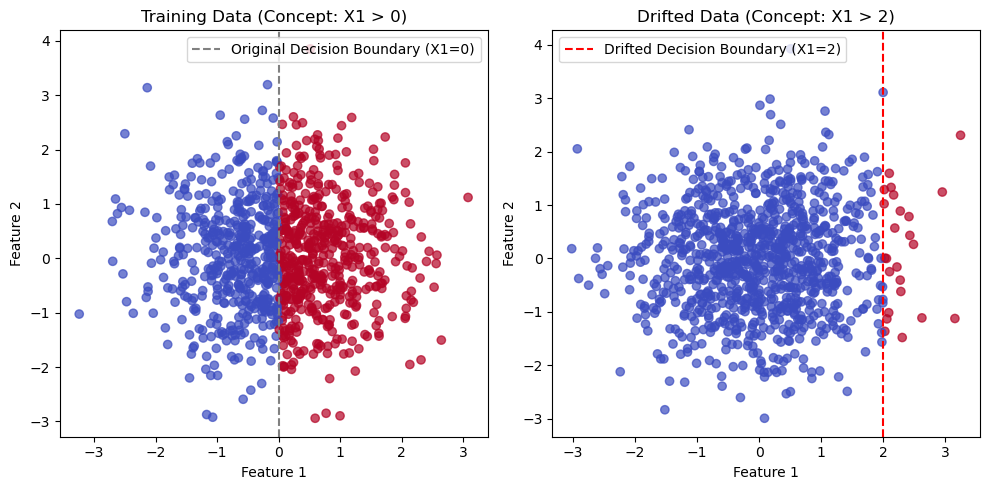

In [22]:
# --- 사례 5: 개념 드리프트 - 결정 경계 이동 (Decision Boundary Shift) ---
print("\n--- 사례 5: 개념 드리프트 - 결정 경계 이동 (Decision Boundary Shift) ---")

# 1. 데이터 생성 (훈련 데이터)
np.random.seed(42)
n_samples = 1000
X_train_concept = np.random.normal(loc=0, scale=1, size=(n_samples, 2))
y_train_concept = (X_train_concept[:, 0] > 0).astype(int) # X1 > 0 이면 Class 1

# 2. 모델 학습
model_concept = LogisticRegression(random_state=42)
model_concept.fit(X_train_concept, y_train_concept)

# 3. 서비스 데이터 생성 (드리프트 발생 - 결정 경계 이동)
# X는 동일한 분포이지만, Y의 기준이 변함
X_test_drifted_concept = np.random.normal(loc=0, scale=1, size=(n_samples, 2))
y_test_drifted_concept = (X_test_drifted_concept[:, 0] > 2).astype(int) # X1 > 2 이면 Class 1

# 4. 성능 평가
train_accuracy_concept = accuracy_score(y_train_concept, model_concept.predict(X_train_concept))
test_accuracy_drifted_concept = accuracy_score(y_test_drifted_concept, model_concept.predict(X_test_drifted_concept))

print(f"훈련 데이터 정확도: {train_accuracy_concept:.4f}")
print(f"드리프트 발생 후 테스트 데이터 정확도: {test_accuracy_drifted_concept:.4f}")

# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_concept[:, 0], X_train_concept[:, 1], c=y_train_concept, cmap='coolwarm', alpha=0.7)
plt.axvline(x=0, color='grey', linestyle='--', label='Original Decision Boundary (X1=0)')
plt.title('Training Data (Concept: X1 > 0)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test_drifted_concept[:, 0], X_test_drifted_concept[:, 1], c=y_test_drifted_concept, cmap='coolwarm', alpha=0.7)
plt.axvline(x=2, color='red', linestyle='--', label='Drifted Decision Boundary (X1=2)')
plt.title('Drifted Data (Concept: X1 > 2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

## 사례 6: 개념 드리프트 - 클래스 경계 형태 변화 (Decision Boundary Shape Change)

- 설명: 결정 경계가 선형에서 비선형으로 바뀌거나, 비선형 형태가 복잡해지는 등 그 형태 자체가 변하는 경우입니다.

- 영향: 선형 모델은 비선형 변화에, 비선형 모델은 더 복잡한 형태 변화에 취약할 수 있습니다.

- 시뮬레이션: 훈련에서는 선형 결정 경계가 유효하지만, 서비스에서는 원형 결정 경계가 필요해집니다.


--- 사례 6: 개념 드리프트 - 클래스 경계 형태 변화 (Decision Boundary Shape Change) ---
훈련 데이터 정확도: 0.9960
드리프트 발생 후 테스트 데이터 정확도: 0.5050


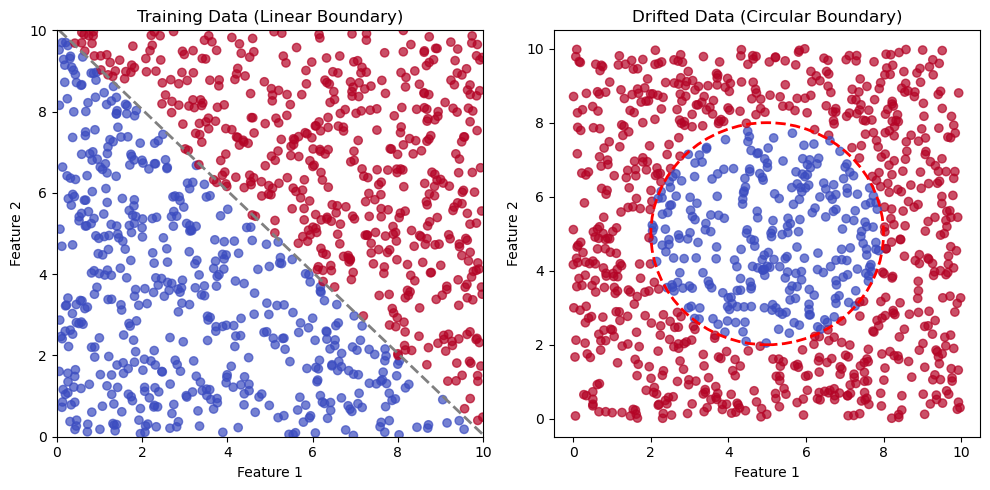

In [23]:
# --- 사례 6: 개념 드리프트 - 클래스 경계 형태 변화 (Decision Boundary Shape Change) ---
print("\n--- 사례 6: 개념 드리프트 - 클래스 경계 형태 변화 (Decision Boundary Shape Change) ---")

# 1. 데이터 생성 (훈련 데이터 - 선형 경계)
np.random.seed(42)
n_samples = 1000
X_train_shape = np.random.rand(n_samples, 2) * 10
y_train_shape = (X_train_shape[:, 0] + X_train_shape[:, 1] > 10).astype(int)

# 2. 모델 학습
model_shape = LogisticRegression(random_state=42) # 선형 모델
model_shape.fit(X_train_shape, y_train_shape)

# 3. 서비스 데이터 생성 (드리프트 발생 - 원형 경계)
X_test_drifted_shape = np.random.rand(n_samples, 2) * 10
# 원점(5,5)에서 거리가 3 이상이면 Class 1
y_test_drifted_shape = (np.sqrt((X_test_drifted_shape[:, 0]-5)**2 + (X_test_drifted_shape[:, 1]-5)**2) > 3).astype(int)

# 4. 성능 평가
train_accuracy_shape = accuracy_score(y_train_shape, model_shape.predict(X_train_shape))
test_accuracy_drifted_shape = accuracy_score(y_test_drifted_shape, model_shape.predict(X_test_drifted_shape))

print(f"훈련 데이터 정확도: {train_accuracy_shape:.4f}")
print(f"드리프트 발생 후 테스트 데이터 정확도: {test_accuracy_drifted_shape:.4f}")

# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_shape[:, 0], X_train_shape[:, 1], c=y_train_shape, cmap='coolwarm', alpha=0.7)
plt.title('Training Data (Linear Boundary)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
Z_train = model_shape.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z_train, colors='grey', levels=[0.5], linestyles='--', linewidths=2)


plt.subplot(1, 2, 2)
plt.scatter(X_test_drifted_shape[:, 0], X_test_drifted_shape[:, 1], c=y_test_drifted_shape, cmap='coolwarm', alpha=0.7)
plt.title('Drifted Data (Circular Boundary)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
circle = plt.Circle((5, 5), 3, color='red', fill=False, linestyle='--', linewidth=2)
plt.gca().add_patch(circle)
plt.tight_layout()
plt.show()

## 사례 7: 레이블 분포 변화 (Label Shift)

- 설명: 입력 특성(X)의 분포나 X와 Y의 관계는 유지되지만, 결과 변수(Y)의 전반적인 빈도 분포가 변하는 경우입니다. 예를 들어, 특정 질병의 유병률 증가, 특정 제품의 판매량 급증 등이 있습니다.

- 영향: 모델 자체의 예측 능력보다는, 예측 결과의 교정(calibration)이나 특정 클래스에 대한 예측 빈도에 영향을 미칩니다. (분류 문제에서 재현율, 정밀도, F1-스코어 등에 영향)

- 시뮬레이션: 훈련 데이터에서는 Class 0과 1이 균등하지만, 서비스 데이터에서는 Class 1의 비율이 급증합니다.


--- 사례 7: 레이블 분포 변화 (Label Shift) ---
훈련 데이터 정확도: 0.5430
드리프트 발생 후 테스트 데이터 정확도: 0.4660
훈련 데이터 레이블 분포: Class 0: 0.51, Class 1: 0.49
드리프트된 테스트 데이터 레이블 분포: Class 0: 0.19, Class 1: 0.81


/var/folders/pv/78hsfpv1623068f45h32ygw80000gn/T/ipykernel_36914/1954919506.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_label, ax=ax[0], palette='viridis')
/var/folders/pv/78hsfpv1623068f45h32ygw80000gn/T/ipykernel_36914/1954919506.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test_drifted_label, ax=ax[1], palette='viridis')


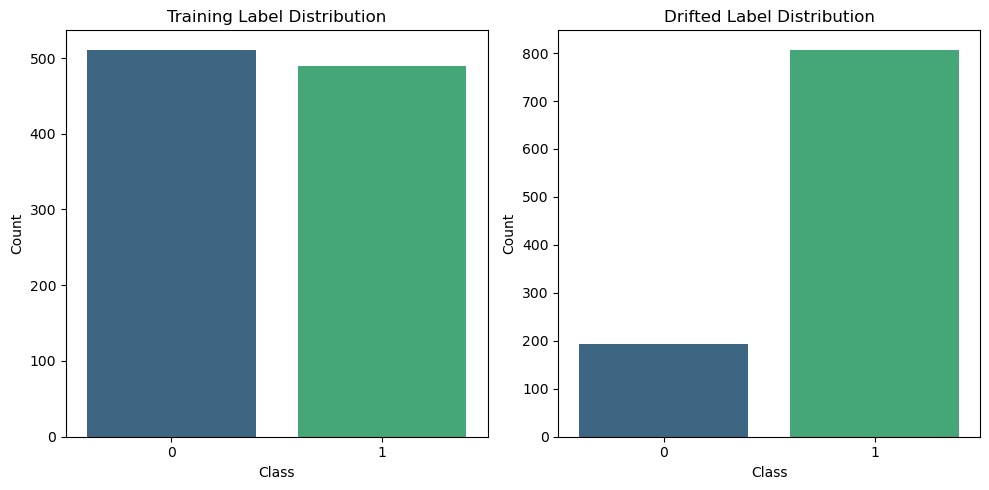

In [24]:
# --- 사례 7: 레이블 분포 변화 (Label Shift) ---
print("\n--- 사례 7: 레이블 분포 변화 (Label Shift) ---")

# 1. 데이터 생성 (훈련 데이터 - 균등한 레이블 분포)
np.random.seed(42)
n_samples = 1000
X_train_label = np.random.rand(n_samples, 2)
y_train_label = np.random.randint(0, 2, size=n_samples) # 0과 1이 약 50:50

# 2. 모델 학습
model_label = LogisticRegression(random_state=42)
model_label.fit(X_train_label, y_train_label)

# 3. 서비스 데이터 생성 (드리프트 발생 - Class 1의 비율 증가)
X_test_drifted_label = np.random.rand(n_samples, 2) # X 분포는 동일
y_test_drifted_label = np.random.choice([0, 1], size=n_samples, p=[0.2, 0.8]) # Class 1이 80%

# 4. 성능 평가
train_accuracy_label = accuracy_score(y_train_label, model_label.predict(X_train_label))
test_accuracy_drifted_label = accuracy_score(y_test_drifted_label, model_label.predict(X_test_drifted_label))

print(f"훈련 데이터 정확도: {train_accuracy_label:.4f}")
print(f"드리프트 발생 후 테스트 데이터 정확도: {test_accuracy_drifted_label:.4f}")

print(f"훈련 데이터 레이블 분포: Class 0: {np.sum(y_train_label==0)/n_samples:.2f}, Class 1: {np.sum(y_train_label==1)/n_samples:.2f}")
print(f"드리프트된 테스트 데이터 레이블 분포: Class 0: {np.sum(y_test_drifted_label==0)/n_samples:.2f}, Class 1: {np.sum(y_test_drifted_label==1)/n_samples:.2f}")

# 시각화 (레이블 분포)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x=y_train_label, ax=ax[0], palette='viridis')
ax[0].set_title('Training Label Distribution')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

sns.countplot(x=y_test_drifted_label, ax=ax[1], palette='viridis')
ax[1].set_title('Drifted Label Distribution')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

## 사례 8: 측정 오류 도입 (Measurement Error Drift)

- 설명: 데이터 수집 방식의 변화로 인해 특성 값에 노이즈나 측정 오류가 추가되는 경우입니다. 예를 들어, 센서 고장, 데이터 입력 오류 증가 등이 있습니다.

- 영향: 모델이 노이즈에 강인하지 못하면 성능이 크게 저하됩니다. 특히 민감한 특성에 오류가 발생하면 더 큰 영향을 받습니다.

- 시뮬레이션: 훈련 데이터에는 깨끗한 특성 값이 있지만, 서비스 데이터에는 특정 특성에 랜덤 노이즈가 추가됩니다.


--- 사례 8: 측정 오류 도입 (Measurement Error Drift) ---
훈련 데이터 정확도: 0.9960
드리프트 발생 후 테스트 데이터 정확도: 0.9970


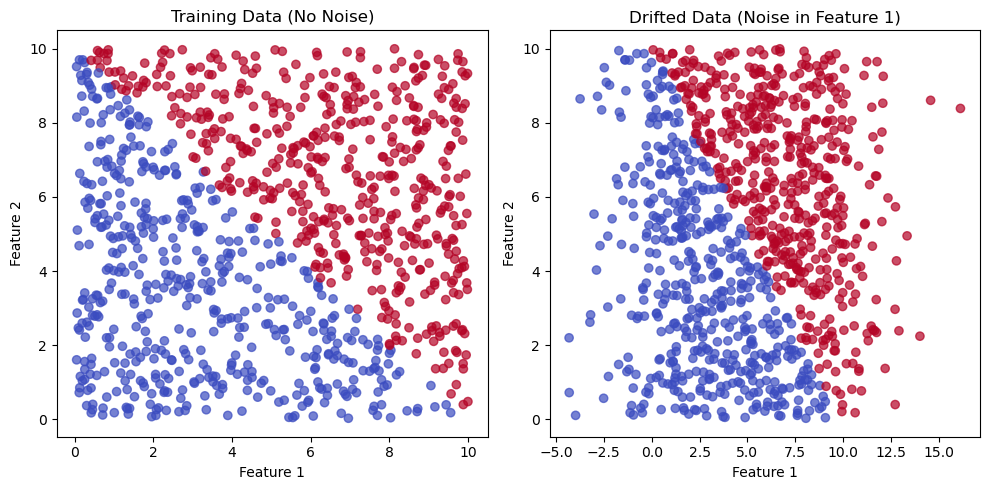

In [25]:
# --- 사례 8: 측정 오류 도입 (Measurement Error Drift) ---
print("\n--- 사례 8: 측정 오류 도입 (Measurement Error Drift) ---")

# 1. 데이터 생성 (훈련 데이터)
np.random.seed(42)
n_samples = 1000
X_train_err = np.random.rand(n_samples, 2) * 10
y_train_err = (X_train_err[:, 0] + X_train_err[:, 1] > 10).astype(int)

# 2. 모델 학습
model_err = LogisticRegression(random_state=42)
model_err.fit(X_train_err, y_train_err)

# 3. 서비스 데이터 생성 (드리프트 발생 - 측정 오류/노이즈 추가)
X_test_drifted_err = X_train_err.copy()
# 특성 1에 노이즈 추가
X_test_drifted_err[:, 0] = X_test_drifted_err[:, 0] + np.random.normal(loc=0, scale=2, size=n_samples)
y_test_drifted_err = (X_test_drifted_err[:, 0] + X_test_drifted_err[:, 1] > 10).astype(int)

# 4. 성능 평가
train_accuracy_err = accuracy_score(y_train_err, model_err.predict(X_train_err))
test_accuracy_drifted_err = accuracy_score(y_test_drifted_err, model_err.predict(X_test_drifted_err))

print(f"훈련 데이터 정확도: {train_accuracy_err:.4f}")
print(f"드리프트 발생 후 테스트 데이터 정확도: {test_accuracy_drifted_err:.4f}")

# 시각화 (노이즈로 인한 분포 변화)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_err[:, 0], X_train_err[:, 1], c=y_train_err, cmap='coolwarm', alpha=0.7)
plt.title('Training Data (No Noise)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_test_drifted_err[:, 0], X_test_drifted_err[:, 1], c=y_test_drifted_err, cmap='coolwarm', alpha=0.7)
plt.title('Drifted Data (Noise in Feature 1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

## 사례 9: 외부 요인에 의한 주기적 변화 (Seasonal/Cyclical Drift)

- 설명: 계절성, 요일, 시간 등 주기적인 외부 요인에 의해 데이터 분포나 특성-레이블 관계가 주기적으로 변하는 경우입니다.

- 영향: 모델이 주기성을 고려하지 못하면 특정 시기에 성능이 급격히 저하됩니다.

- 시뮬레이션: 훈련 데이터는 특정 계절의 데이터지만, 서비스 데이터는 다른 계절의 데이터로, 계절에 따라 패턴이 달라집니다.


--- 사례 9: 외부 요인에 의한 주기적 변화 (Seasonal/Cyclical Drift) ---
훈련 데이터 정확도: 0.8650
드리프트 발생 후 테스트 데이터 정확도: 0.0720


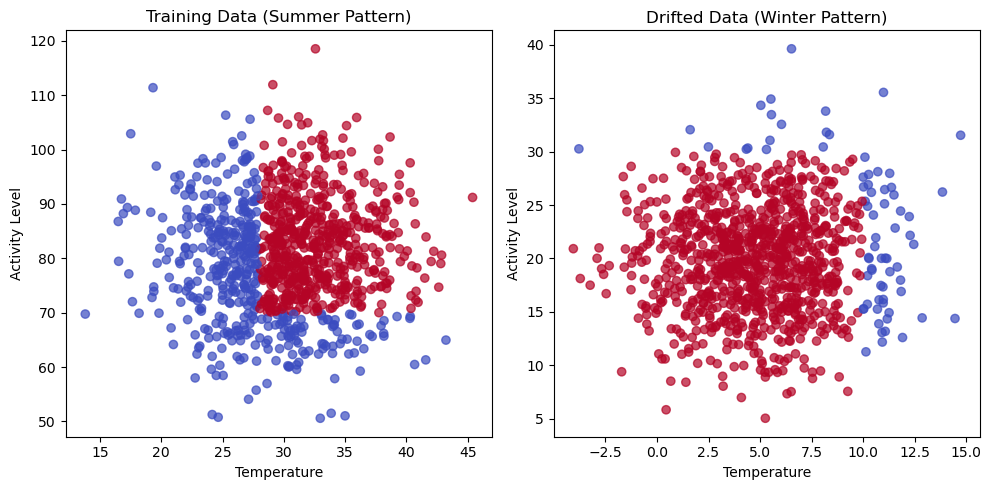

In [26]:
# --- 사례 9: 외부 요인에 의한 주기적 변화 (Seasonal/Cyclical Drift) ---
print("\n--- 사례 9: 외부 요인에 의한 주기적 변화 (Seasonal/Cyclical Drift) ---")

# 1. 데이터 생성 (훈련 데이터 - '여름' 패턴)
np.random.seed(42)
n_samples = 1000
# 특성 1: 온도, 특성 2: 활동량
X_train_seasonal = np.random.normal(loc=[30, 80], scale=[5, 10], size=(n_samples, 2))
# 여름에는 온도가 높고 활동량이 많으면 긍정(1)
y_train_seasonal = ((X_train_seasonal[:, 0] > 28) & (X_train_seasonal[:, 1] > 70)).astype(int)

# 2. 모델 학습
model_seasonal = LogisticRegression(random_state=42)
model_seasonal.fit(X_train_seasonal, y_train_seasonal)

# 3. 서비스 데이터 생성 (드리프트 발생 - '겨울' 패턴)
# 겨울에는 온도가 낮고 활동량이 적으면 긍정(1)
X_test_drifted_seasonal = np.random.normal(loc=[5, 20], scale=[3, 5], size=(n_samples, 2))
y_test_drifted_seasonal = ((X_test_drifted_seasonal[:, 0] < 10) & (X_test_drifted_seasonal[:, 1] < 30)).astype(int)


# 4. 성능 평가
train_accuracy_seasonal = accuracy_score(y_train_seasonal, model_seasonal.predict(X_train_seasonal))
test_accuracy_drifted_seasonal = accuracy_score(y_test_drifted_seasonal, model_seasonal.predict(X_test_drifted_seasonal))

print(f"훈련 데이터 정확도: {train_accuracy_seasonal:.4f}")
print(f"드리프트 발생 후 테스트 데이터 정확도: {test_accuracy_drifted_seasonal:.4f}")

# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_seasonal[:, 0], X_train_seasonal[:, 1], c=y_train_seasonal, cmap='coolwarm', alpha=0.7)
plt.title('Training Data (Summer Pattern)')
plt.xlabel('Temperature')
plt.ylabel('Activity Level')

plt.subplot(1, 2, 2)
plt.scatter(X_test_drifted_seasonal[:, 0], X_test_drifted_seasonal[:, 1], c=y_test_drifted_seasonal, cmap='coolwarm', alpha=0.7)
plt.title('Drifted Data (Winter Pattern)')
plt.xlabel('Temperature')
plt.ylabel('Activity Level')
plt.tight_layout()
plt.show()

## 사례 10: 개념 드리프트 - 서브그룹 성능 불균형 (Subgroup Performance Imbalance)

- 설명: 전체 데이터셋에 대한 모델 성능은 유지될 수 있지만, 특정 서브그룹(예: 연령대, 성별, 지역)에 대한 모델 성능이 저하되는 경우입니다. 이는 사회 경제적 변화, 정책 변화 등으로 특정 서브그룹의 특성-레이블 관계가 변할 때 발생할 수 있습니다.

- 영향: 전체적인 지표로는 드리프트를 감지하기 어렵지만, 특정 사용자 그룹에게 불공정한 결과를 초래할 수 있습니다.

- 시뮬레이션: 훈련 데이터는 두 서브그룹이 혼합되어 있지만, 한 서브그룹의 X−Y 관계가 서비스에서 변경됩니다.


--- 사례 10: 개념 드리프트 - 서브그룹 성능 불균형 ---
훈련 데이터 전체 정확도: 1.0000
드리프트 발생 후 테스트 데이터 전체 정확도: 0.6440

훈련 데이터 서브그룹 0 정확도: 1.0000
훈련 데이터 서브그룹 1 정확도: 1.0000
드리프트 후 테스트 데이터 서브그룹 0 정확도: 0.8768
드리프트 후 테스트 데이터 서브그룹 1 정확도: 0.4158


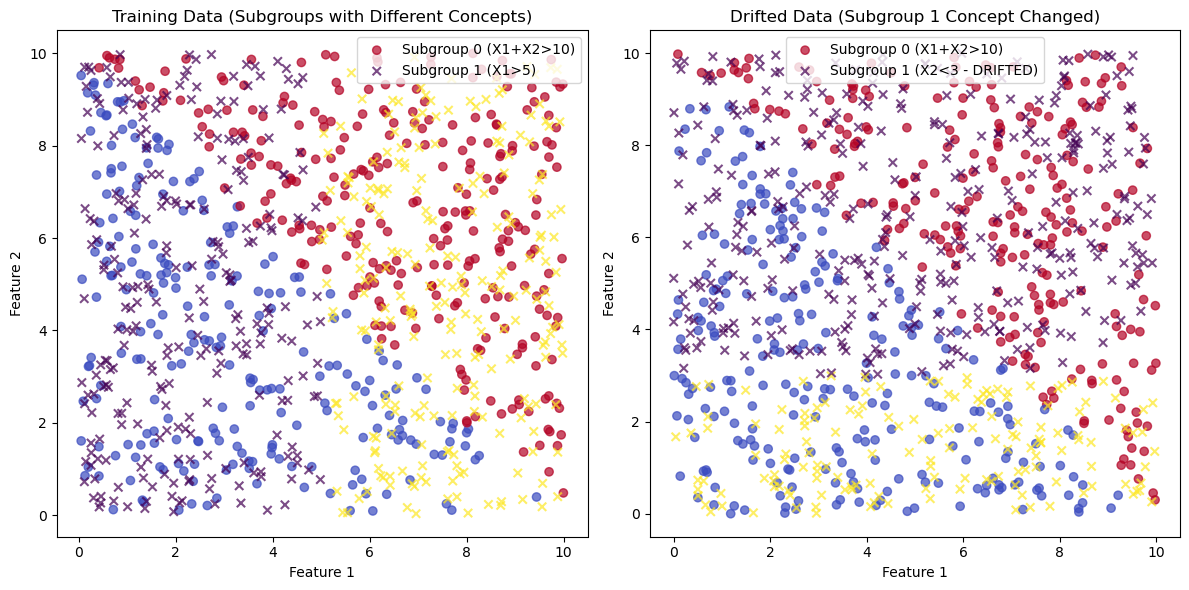

In [27]:
# --- 사례 10: 개념 드리프트 - 서브그룹 성능 불균형 (Subgroup Performance Imbalance) ---
print("\n--- 사례 10: 개념 드리프트 - 서브그룹 성능 불균형 ---")

# 1. 데이터 생성 (훈련 데이터)
np.random.seed(42)
n_samples = 1000
X_train_sub = np.random.rand(n_samples, 2) * 10
# 서브그룹 0: X1+X2 > 10 (약 500개)
# 서브그룹 1: X1 > 5 (약 500개)
y_train_sub = np.zeros(n_samples)
subgroup_mask = np.random.choice([0, 1], size=n_samples) # 0과 1 서브그룹 대략 절반씩
y_train_sub[subgroup_mask == 0] = (X_train_sub[subgroup_mask == 0, 0] + X_train_sub[subgroup_mask == 0, 1] > 10).astype(int)
y_train_sub[subgroup_mask == 1] = (X_train_sub[subgroup_mask == 1, 0] > 5).astype(int)

# 2. 모델 학습
model_sub = RandomForestClassifier(random_state=42) # 복잡한 모델
model_sub.fit(X_train_sub, y_train_sub)

# 3. 서비스 데이터 생성 (드리프트 발생 - 서브그룹 1의 개념 변경)
X_test_drifted_sub = np.random.rand(n_samples, 2) * 10
y_test_drifted_sub = np.zeros(n_samples)
subgroup_mask_test = np.random.choice([0, 1], size=n_samples)

# 서브그룹 0는 기존 개념 유지
y_test_drifted_sub[subgroup_mask_test == 0] = (X_test_drifted_sub[subgroup_mask_test == 0, 0] + X_test_drifted_sub[subgroup_mask_test == 0, 1] > 10).astype(int)
# 서브그룹 1의 개념이 변경됨: X2 < 3 이면 Class 1
y_test_drifted_sub[subgroup_mask_test == 1] = (X_test_drifted_sub[subgroup_mask_test == 1, 1] < 3).astype(int)

# 4. 성능 평가
train_accuracy_sub = accuracy_score(y_train_sub, model_sub.predict(X_train_sub))
test_accuracy_drifted_sub = accuracy_score(y_test_drifted_sub, model_sub.predict(X_test_drifted_sub))

print(f"훈련 데이터 전체 정확도: {train_accuracy_sub:.4f}")
print(f"드리프트 발생 후 테스트 데이터 전체 정확도: {test_accuracy_drifted_sub:.4f}")

# 서브그룹별 성능 평가
# 훈련 데이터 서브그룹 0 성능
preds_train_sub0 = model_sub.predict(X_train_sub[subgroup_mask == 0])
true_train_sub0 = y_train_sub[subgroup_mask == 0]
acc_train_sub0 = accuracy_score(true_train_sub0, preds_train_sub0)

# 훈련 데이터 서브그룹 1 성능
preds_train_sub1 = model_sub.predict(X_train_sub[subgroup_mask == 1])
true_train_sub1 = y_train_sub[subgroup_mask == 1]
acc_train_sub1 = accuracy_score(true_train_sub1, preds_train_sub1)

print(f"\n훈련 데이터 서브그룹 0 정확도: {acc_train_sub0:.4f}")
print(f"훈련 데이터 서브그룹 1 정확도: {acc_train_sub1:.4f}")


# 드리프트된 테스트 데이터 서브그룹 0 성능
preds_test_sub0 = model_sub.predict(X_test_drifted_sub[subgroup_mask_test == 0])
true_test_sub0 = y_test_drifted_sub[subgroup_mask_test == 0]
acc_test_sub0 = accuracy_score(true_test_sub0, preds_test_sub0)

# 드리프트된 테스트 데이터 서브그룹 1 성능
preds_test_sub1 = model_sub.predict(X_test_drifted_sub[subgroup_mask_test == 1])
true_test_sub1 = y_test_drifted_sub[subgroup_mask_test == 1]
acc_test_sub1 = accuracy_score(true_test_sub1, preds_test_sub1)

print(f"드리프트 후 테스트 데이터 서브그룹 0 정확도: {acc_test_sub0:.4f}")
print(f"드리프트 후 테스트 데이터 서브그룹 1 정확도: {acc_test_sub1:.4f}")

# 시각화 (두 서브그룹의 개념 변화)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_sub[subgroup_mask == 0, 0], X_train_sub[subgroup_mask == 0, 1], c=y_train_sub[subgroup_mask == 0], cmap='coolwarm', alpha=0.7, label='Subgroup 0 (X1+X2>10)')
plt.scatter(X_train_sub[subgroup_mask == 1, 0], X_train_sub[subgroup_mask == 1, 1], c=y_train_sub[subgroup_mask == 1], cmap='viridis', alpha=0.7, marker='x', label='Subgroup 1 (X1>5)')
plt.title('Training Data (Subgroups with Different Concepts)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(X_test_drifted_sub[subgroup_mask_test == 0, 0], X_test_drifted_sub[subgroup_mask_test == 0, 1], c=y_test_drifted_sub[subgroup_mask_test == 0], cmap='coolwarm', alpha=0.7, label='Subgroup 0 (X1+X2>10)')
plt.scatter(X_test_drifted_sub[subgroup_mask_test == 1, 0], X_test_drifted_sub[subgroup_mask_test == 1, 1], c=y_test_drifted_sub[subgroup_mask_test == 1], cmap='viridis', alpha=0.7, marker='x', label='Subgroup 1 (X2<3 - DRIFTED)')
plt.title('Drifted Data (Subgroup 1 Concept Changed)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

## 사례 11: 입력 특성 중요도 변화 (Feature Importance Shift)

- 설명: 모델 예측에 기여하는 각 특성의 상대적 중요도가 변하는 경우입니다. 예를 들어, 과거에는 가격이 중요했지만, 이제는 디자인이 구매 결정에 더 큰 영향을 미치는 경우 등.

- 영향: 모델이 여전히 과거의 중요 특성에 과도하게 의존하여 새로운 환경에 적응하지 못합니다. 특정 특성을 제거하거나 추가하는 피처 엔지니어링 전략이 무효화될 수 있습니다.

- 시뮬레이션: 훈련에서는 X1이 X2보다 중요하지만, 서비스에서는 X2가 더 중요해집니다.


--- 사례 11: 입력 특성 중요도 변화 (Feature Importance Shift) ---
훈련 데이터 정확도: 1.0000
드리프트 발생 후 테스트 데이터 정확도: 0.7380
훈련 모델의 특성 중요도: X1=0.8237, X2=0.1763


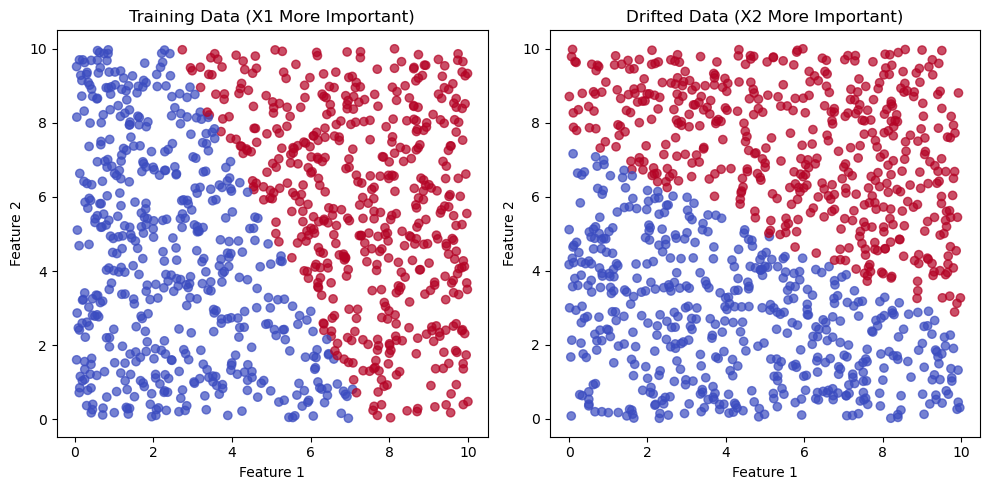

In [28]:
# --- 사례 11: 입력 특성 중요도 변화 (Feature Importance Shift) ---
print("\n--- 사례 11: 입력 특성 중요도 변화 (Feature Importance Shift) ---")

# 1. 데이터 생성 (훈련 데이터 - X1이 X2보다 중요)
np.random.seed(42)
n_samples = 1000
X_train_imp = np.random.rand(n_samples, 2) * 10
# X1의 영향이 더 크게
y_train_imp = (X_train_imp[:, 0] * 2 + X_train_imp[:, 1] > 15).astype(int)

# 2. 모델 학습 (랜덤 포레스트: 특성 중요도 확인 가능)
model_imp = RandomForestClassifier(random_state=42)
model_imp.fit(X_train_imp, y_train_imp)

# 3. 서비스 데이터 생성 (드리프트 발생 - X2가 X1보다 중요)
X_test_drifted_imp = np.random.rand(n_samples, 2) * 10
# X2의 영향이 더 크게
y_test_drifted_imp = (X_test_drifted_imp[:, 0] + X_test_drifted_imp[:, 1] * 2 > 15).astype(int)

# 4. 성능 평가
train_accuracy_imp = accuracy_score(y_train_imp, model_imp.predict(X_train_imp))
test_accuracy_drifted_imp = accuracy_score(y_test_drifted_imp, model_imp.predict(X_test_drifted_imp))

print(f"훈련 데이터 정확도: {train_accuracy_imp:.4f}")
print(f"드리프트 발생 후 테스트 데이터 정확도: {test_accuracy_drifted_imp:.4f}")

# 훈련 모델의 특성 중요도
print(f"훈련 모델의 특성 중요도: X1={model_imp.feature_importances_[0]:.4f}, X2={model_imp.feature_importances_[1]:.4f}")

# 시각화 (특성 중요도는 수치로 비교)
# 여기서는 시각화보다는 특성 중요도 값 자체로 변화를 인지하는 것이 핵심.
# 복잡한 모델의 경우 Shapley Values (SHAP) 등으로 중요도를 시각화할 수 있음.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_imp[:, 0], X_train_imp[:, 1], c=y_train_imp, cmap='coolwarm', alpha=0.7)
plt.title('Training Data (X1 More Important)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_test_drifted_imp[:, 0], X_test_drifted_imp[:, 1], c=y_test_drifted_imp, cmap='coolwarm', alpha=0.7)
plt.title('Drifted Data (X2 More Important)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

## 사례 12: 데이터 희소성 증가 (Increased Data Sparsity)

- 설명: 특정 특성 조합이나 특정 값 범위의 데이터가 훈련 시에는 풍부했으나, 서비스에서는 매우 드물게 나타나는 경우입니다.

- 영향: 모델이 희소해진 영역에 대한 예측 성능이 급격히 저하됩니다.

- 시뮬레이션: 훈련 데이터는 특정 영역에 밀집되어 있지만, 서비스 데이터는 해당 영역이 거의 없습니다.


--- 사례 12: 데이터 희소성 증가 (Increased Data Sparsity) ---
훈련 데이터 정확도: 0.9970
드리프트 발생 후 테스트 데이터 정확도: 1.0000


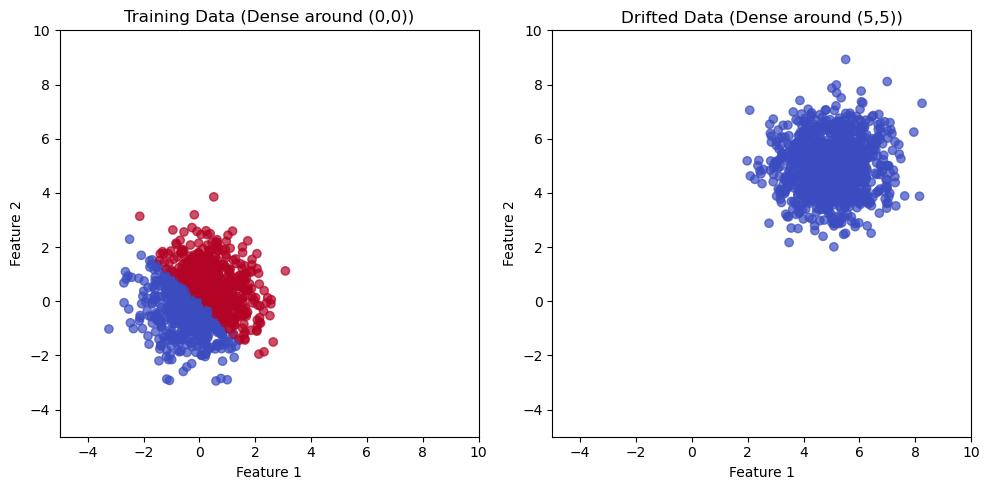

KS-test p-value for Feature 0 (Train vs Drifted): 0.0000
KS-test p-value for Feature 1 (Train vs Drifted): 0.0000


In [29]:
# --- 사례 12: 데이터 희소성 증가 (Increased Data Sparsity) ---
print("\n--- 사례 12: 데이터 희소성 증가 (Increased Data Sparsity) ---")

# 1. 데이터 생성 (훈련 데이터 - 특정 영역에 밀집)
np.random.seed(42)
n_samples = 1000
# (0,0) 주변에 밀집된 데이터
X_train_sparse = np.random.normal(loc=[0, 0], scale=[1, 1], size=(n_samples, 2))
y_train_sparse = (X_train_sparse[:, 0] + X_train_sparse[:, 1] > 0).astype(int)

# 2. 모델 학습
model_sparse = LogisticRegression(random_state=42)
model_sparse.fit(X_train_sparse, y_train_sparse)

# 3. 서비스 데이터 생성 (드리프트 발생 - 밀집 영역이 사라지고 다른 영역에 데이터가 많아짐)
# (5,5) 주변에 밀집된 데이터
X_test_drifted_sparse = np.random.normal(loc=[5, 5], scale=[1, 1], size=(n_samples, 2))
y_test_drifted_sparse = (X_test_drifted_sparse[:, 0] + X_test_drifted_sparse[:, 1] > 0).astype(int)

# 4. 성능 평가
train_accuracy_sparse = accuracy_score(y_train_sparse, model_sparse.predict(X_train_sparse))
test_accuracy_drifted_sparse = accuracy_score(y_test_drifted_sparse, model_sparse.predict(X_test_drifted_sparse))

print(f"훈련 데이터 정확도: {train_accuracy_sparse:.4f}")
print(f"드리프트 발생 후 테스트 데이터 정확도: {test_accuracy_drifted_sparse:.4f}")

# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_sparse[:, 0], X_train_sparse[:, 1], c=y_train_sparse, cmap='coolwarm', alpha=0.7)
plt.title('Training Data (Dense around (0,0))')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.subplot(1, 2, 2)
plt.scatter(X_test_drifted_sparse[:, 0], X_test_drifted_sparse[:, 1], c=y_test_drifted_sparse, cmap='coolwarm', alpha=0.7)
plt.title('Drifted Data (Dense around (5,5))')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.tight_layout()
plt.show()

# 정량적 분포 차이 확인 (KS 테스트)
ks_stat_sparse_x0, p_value_sparse_x0 = ks_2samp(X_train_sparse[:, 0], X_test_drifted_sparse[:, 0])
ks_stat_sparse_x1, p_value_sparse_x1 = ks_2samp(X_train_sparse[:, 1], X_test_drifted_sparse[:, 1])
print(f"KS-test p-value for Feature 0 (Train vs Drifted): {p_value_sparse_x0:.4f}")
print(f"KS-test p-value for Feature 1 (Train vs Drifted): {p_value_sparse_x1:.4f}")

## 결론: 데이터 드리프트 관리 전략

- 지속적인 모니터링: 훈련 데이터와 서비스 데이터의 분포 변화, 모델 성능 지표 모니터링

- 드리프트 감지 기법: 통계적 검정 (KS-test, Chi-squared test), 몬테카를로 시뮬레이션, 재구성 오류 기반 방법 등

### 재훈련 전략:

- 주기적 재훈련

- 드리프트 감지 시 재훈련

- 점진적 학습 (Incremental Learning)

- 전이 학습 (Transfer Learning)

- 강인한 모델 설계: 드리프트에 덜 민감한 모델 아키텍처 사용 (예: 도메인 적응)

- 데이터 파이프라인 관리: 데이터 수집 및 전처리 과정의 안정성 확보

In [ ]:
## 파일의 끝